In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the CSV file
df = pd.read_csv("../data/blackrock_2022_Q1_holdings_value_esgrisk.csv")

In [3]:
# Checking what are the columns and sample of data
df.head()

,Unnamed: 0,Stock,Company Name,Sector,Shares Held or Principal Amt,ESG Risk,Market Value,% of Portfolio
0,0,AAPL,Apple Inc.,INFORMATION TECHNOLOGY,"1,027,632,887",17.0,"$179,434,978,000",4.74
1,1,MSFT,Microsoft Corporation,INFORMATION TECHNOLOGY,"523,749,870",15.0,"$161,477,322,000",4.26
2,2,AMZN,Amazon.com Inc.,CONSUMER DISCRETIONARY,"582,877,640",30.0,"$95,007,597,000",2.51
3,3,BP,BP p.l.c.,ENERGY,"1,950,622,815",NaN,"$63,141,660,522",1.67
4,4,TSLA,Tesla Inc.,CONSUMER DISCRETIONARY,"55,241,453",29.0,"$59,528,191,000",1.57


In [4]:
# Changing the columns names
df = df.rename(columns={"Shares Held or Principal Amt": "Units"})
df.head()

,Unnamed: 0,Stock,Company Name,Sector,Units,ESG Risk,Market Value,% of Portfolio
0,0,AAPL,Apple Inc.,INFORMATION TECHNOLOGY,"1,027,632,887",17.0,"$179,434,978,000",4.74
1,1,MSFT,Microsoft Corporation,INFORMATION TECHNOLOGY,"523,749,870",15.0,"$161,477,322,000",4.26
2,2,AMZN,Amazon.com Inc.,CONSUMER DISCRETIONARY,"582,877,640",30.0,"$95,007,597,000",2.51
3,3,BP,BP p.l.c.,ENERGY,"1,950,622,815",NaN,"$63,141,660,522",1.67
4,4,TSLA,Tesla Inc.,CONSUMER DISCRETIONARY,"55,241,453",29.0,"$59,528,191,000",1.57


In [5]:
# Dropping unnecessary column
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Stock,Company Name,Sector,Units,ESG Risk,Market Value,% of Portfolio
0,AAPL,Apple Inc.,INFORMATION TECHNOLOGY,"1,027,632,887",17.0,"$179,434,978,000",4.74
1,MSFT,Microsoft Corporation,INFORMATION TECHNOLOGY,"523,749,870",15.0,"$161,477,322,000",4.26
2,AMZN,Amazon.com Inc.,CONSUMER DISCRETIONARY,"582,877,640",30.0,"$95,007,597,000",2.51
3,BP,BP p.l.c.,ENERGY,"1,950,622,815",NaN,"$63,141,660,522",1.67
4,TSLA,Tesla Inc.,CONSUMER DISCRETIONARY,"55,241,453",29.0,"$59,528,191,000",1.57


In [6]:
# Checking what types of data are in the table
df.dtypes

Stock              object
Company Name       object
Sector             object
Units              object
ESG Risk          float64
Market Value       object
% of Portfolio    float64
dtype: object

In [7]:
# Changing type of data in columns
df["Units"] = df["Units"].str.replace(",", "").astype(float)
df["Market Value"] = (
    df["Market Value"].str.replace(",", "").str.replace("$", "").astype(float)
)
df.dtypes

Stock              object
Company Name       object
Sector             object
Units             float64
ESG Risk          float64
Market Value      float64
% of Portfolio    float64
dtype: object

In [8]:
df.head()

,Stock,Company Name,Sector,Units,ESG Risk,Market Value,% of Portfolio
0,AAPL,Apple Inc.,INFORMATION TECHNOLOGY,1.027633e+09,17.0,1.794350e+11,4.74
1,MSFT,Microsoft Corporation,INFORMATION TECHNOLOGY,5.237499e+08,15.0,1.614773e+11,4.26
2,AMZN,Amazon.com Inc.,CONSUMER DISCRETIONARY,5.828776e+08,30.0,9.500760e+10,2.51
3,BP,BP p.l.c.,ENERGY,1.950623e+09,NaN,6.314166e+10,1.67
4,TSLA,Tesla Inc.,CONSUMER DISCRETIONARY,5.524145e+07,29.0,5.952819e+10,1.57


In [9]:
# Changing the display format to be more user-friendly
pd.options.display.float_format = "{:,.2f}".format
df.head()

,Stock,Company Name,Sector,Units,ESG Risk,Market Value,% of Portfolio
0,AAPL,Apple Inc.,INFORMATION TECHNOLOGY,"1,027,632,887.00",17.00,"179,434,978,000.00",4.74
1,MSFT,Microsoft Corporation,INFORMATION TECHNOLOGY,"523,749,870.00",15.00,"161,477,322,000.00",4.26
2,AMZN,Amazon.com Inc.,CONSUMER DISCRETIONARY,"582,877,640.00",30.00,"95,007,597,000.00",2.51
3,BP,BP p.l.c.,ENERGY,"1,950,622,815.00",NaN,"63,141,660,522.00",1.67
4,TSLA,Tesla Inc.,CONSUMER DISCRETIONARY,"55,241,453.00",29.00,"59,528,191,000.00",1.57


In [10]:
# Creating pivot table to display total market value for each sector
pivot_table = df.pivot_table(index="Sector", values="Market Value", aggfunc="sum")
pivot_table = pivot_table.rename(columns={"Market Value": "Total Market Value"})
pivot_table = pivot_table.sort_values(by="Total Market Value", ascending=False)
print(pivot_table)

                                   Total Market Value
Sector                                               
INFORMATION TECHNOLOGY           1,070,440,262,881.00
FINANCE                            614,254,403,038.00
HEALTH CARE                        502,098,102,755.00
CONSUMER DISCRETIONARY             416,630,215,334.00
COMMUNICATIONS                     260,615,085,441.00
INDUSTRIALS                        256,060,068,065.00
CONSUMER STAPLES                   224,259,943,537.00
ENERGY                             213,527,405,218.00
UTILITIES AND TELECOMMUNICATIONS   173,157,815,924.00
REAL ESTATE                        142,003,466,705.00
MATERIALS                          121,986,200,555.00
TRANSPORTS                          62,562,105,665.00


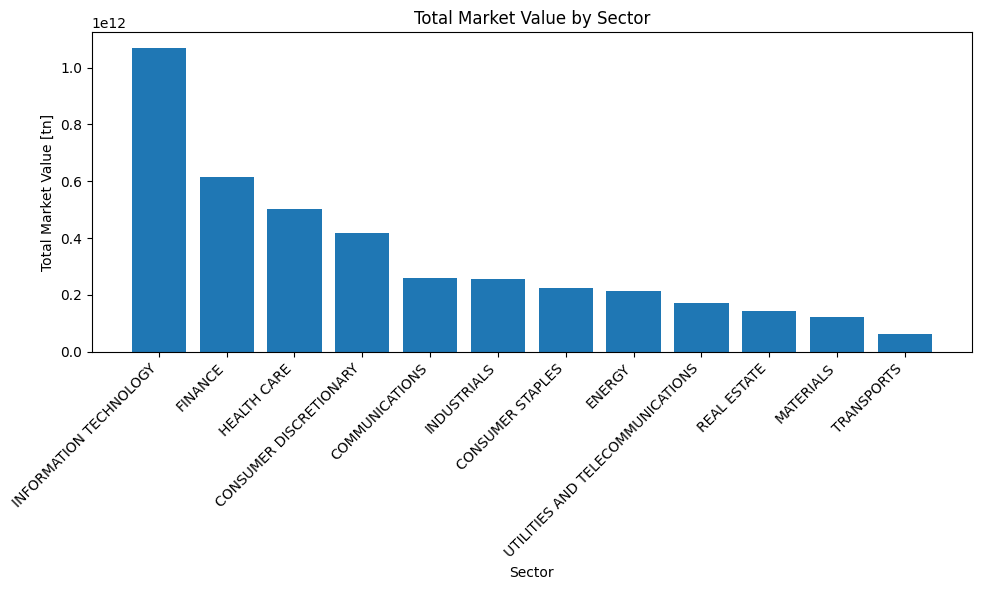

In [11]:
# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index, pivot_table["Total Market Value"])
plt.xlabel("Sector")
plt.ylabel("Total Market Value [tn]")
plt.title("Total Market Value by Sector")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

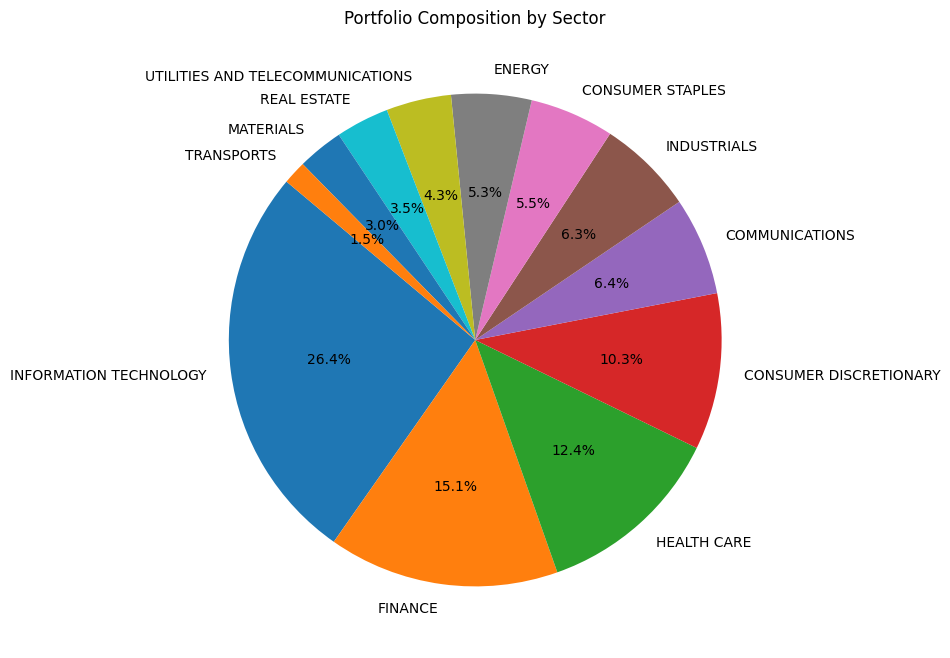

In [12]:
# Pie chart with matplotlib
portfolio_percentage = (
    pivot_table["Total Market Value"] / pivot_table["Total Market Value"].sum()
) * 100
plt.figure(figsize=(8, 8))
plt.pie(
    portfolio_percentage, labels=pivot_table.index, autopct="%1.1f%%", startangle=140
)
plt.title("Portfolio Composition by Sector")
plt.show()

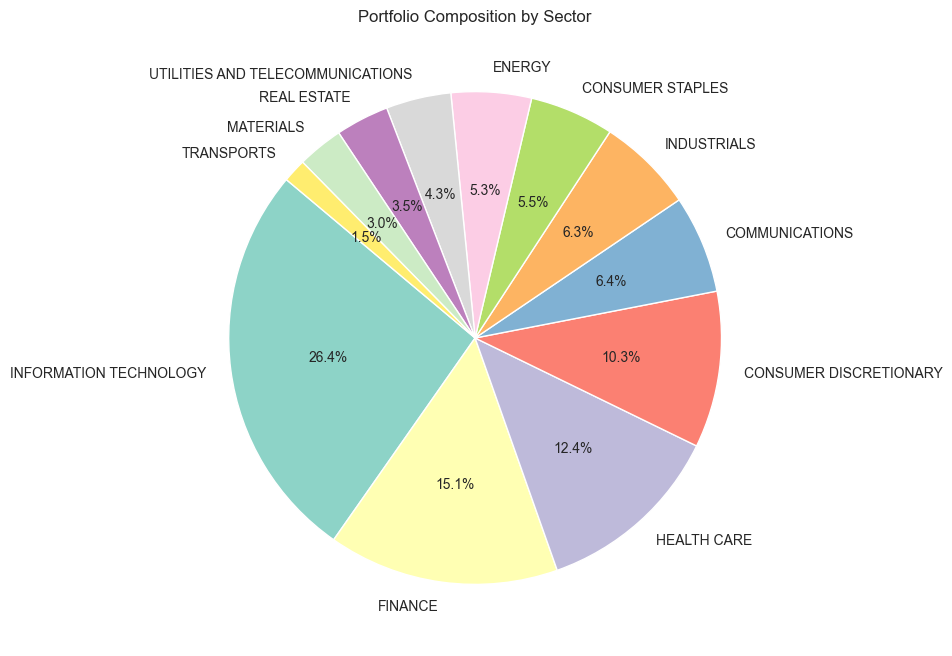

In [13]:
# Pie chart with seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set3", len(portfolio_percentage))
plt.pie(
    portfolio_percentage,
    labels=pivot_table.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors, 
)
plt.title("Portfolio Composition by Sector")

plt.show()